MODELO ML HOSPITALIZACIONES 

Se busca crear un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=UserWarning)

Carga de datos

In [3]:
data= pd.read_excel("BBDD_Hospitalización.xlsx")
data.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [5]:
data.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

In [6]:
data.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


Eliminar duplicados

In [7]:
data.duplicated().sum()

np.int64(109)

In [8]:
data.drop_duplicates(inplace=True)

Borrar nulos

In [9]:
data.isna().sum()

EDAD                                                                          1
DIABETES                                                                      1
HOSPITALIZACIÓN ULTIMO MES                                                    1
PSA                                                                           5
BIOPSIAS PREVIAS                                                              3
VOLUMEN PROSTATICO                                                            2
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       1
NUMERO DE MUESTRAS TOMADAS                                                    1
CUP                                                                           2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             3
BIOPSIA                                                                       1
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     1
FIEBRE                                  

In [10]:
data.dropna(inplace=True)

EXPLORACIÓN DE DATOS

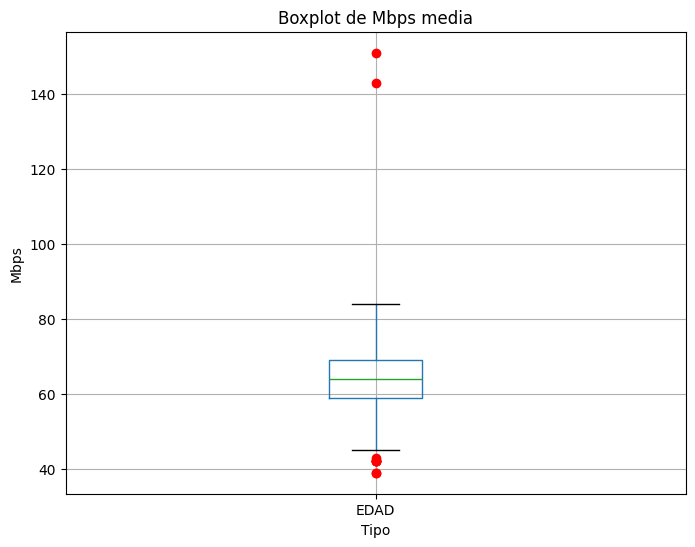

In [11]:
data['EDAD'] = data['EDAD'].astype(int)

plt.figure(figsize=(8,6))
data.boxplot(column=['EDAD'], sym='ro')
plt.title('Boxplot de Mbps media')
plt.xlabel('Tipo')
plt.ylabel('Mbps')
plt.show()

>Se encuentran dato de mas de 100 años de edad lo que se tomara como un error y no se obtendran en el analisis

In [12]:
data = data[data['EDAD'] <= 100]


Variable numéricas

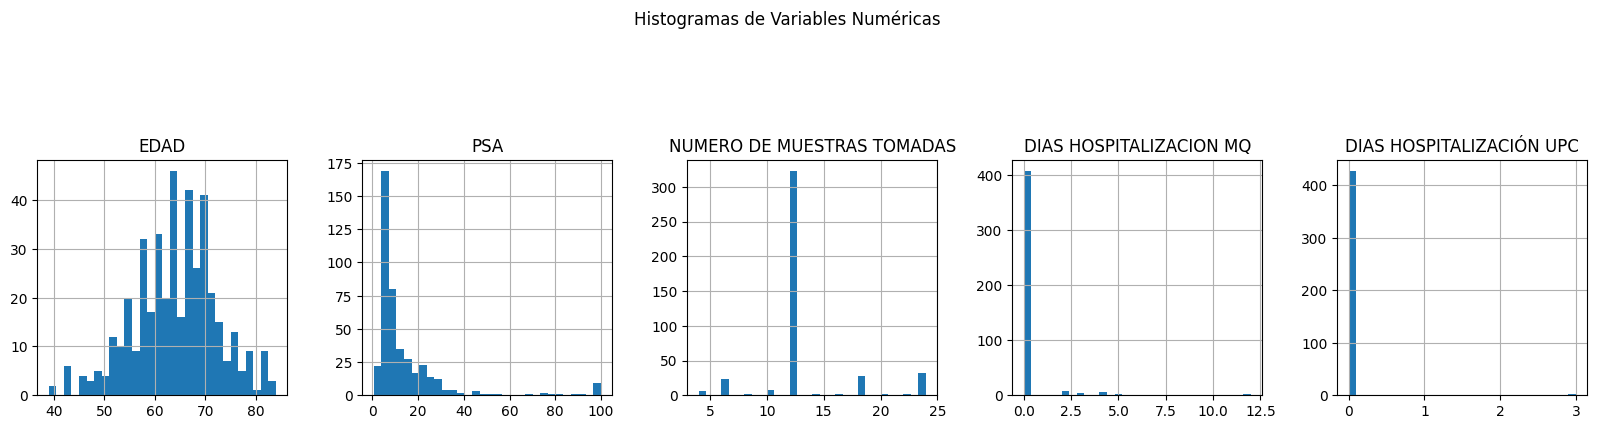

In [13]:
# Histogramas de variables numéricas
data
data.hist(bins=30, figsize=(20, 15), layout=(4, 5))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

Variables categoricas

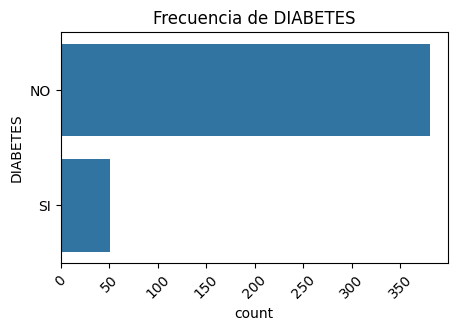

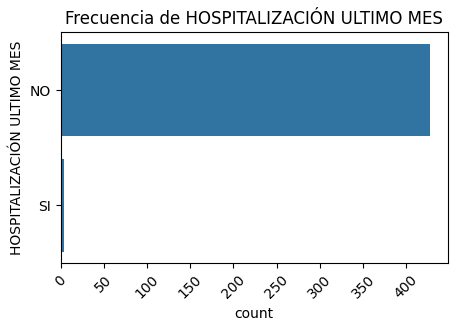

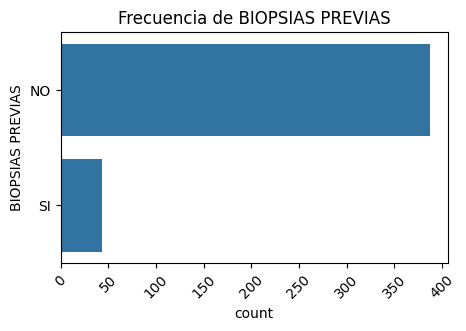

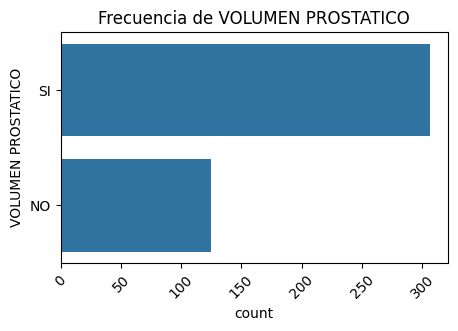

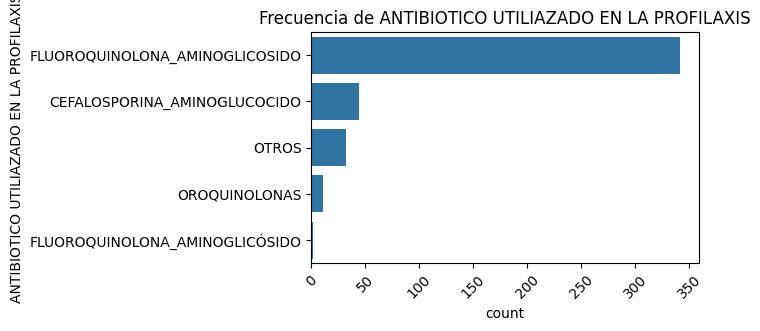

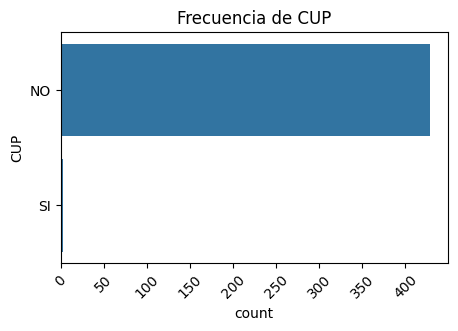

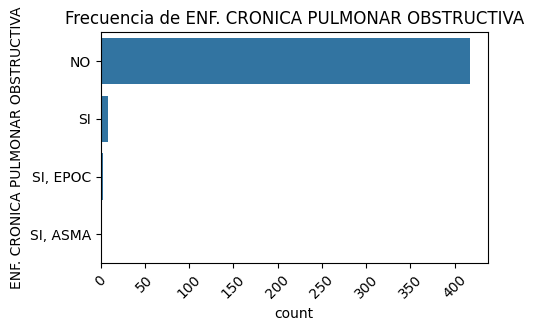

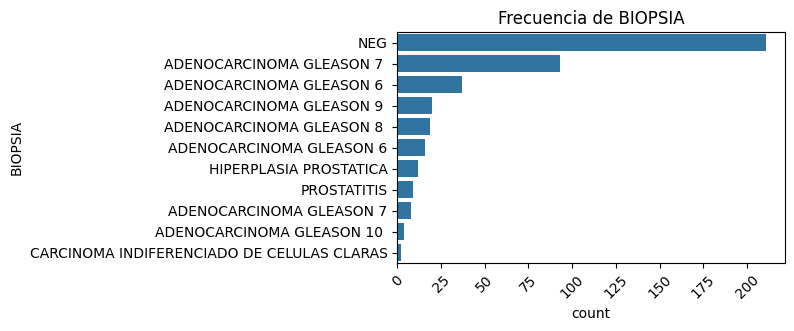

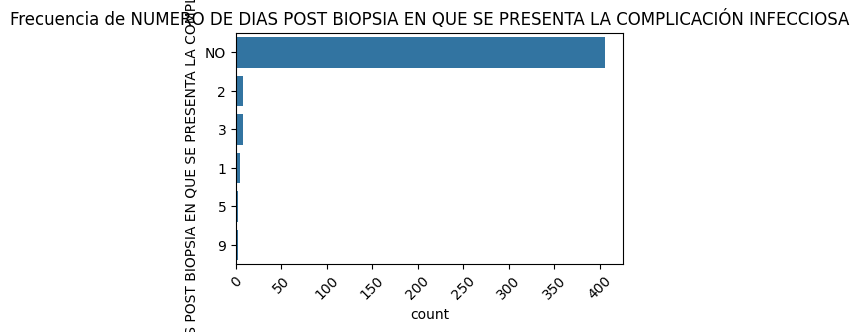

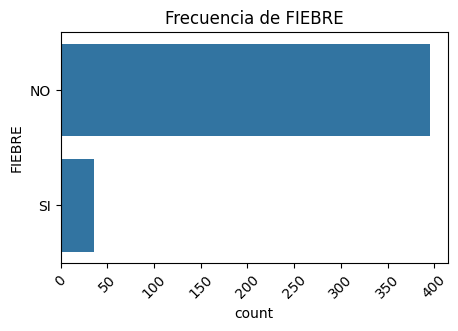

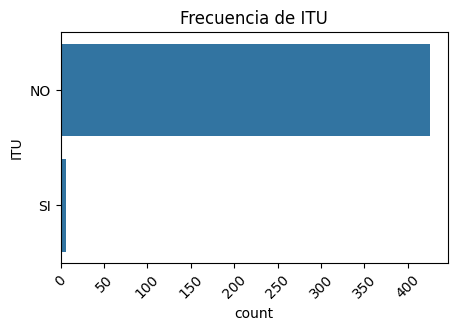

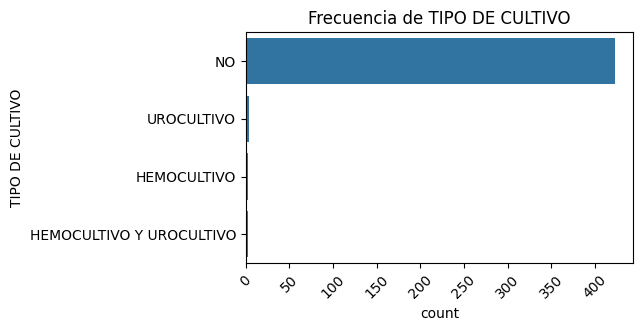

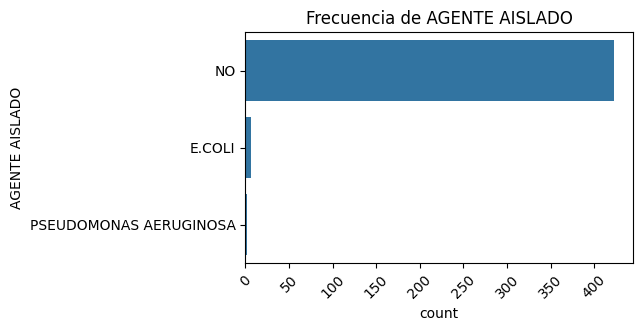

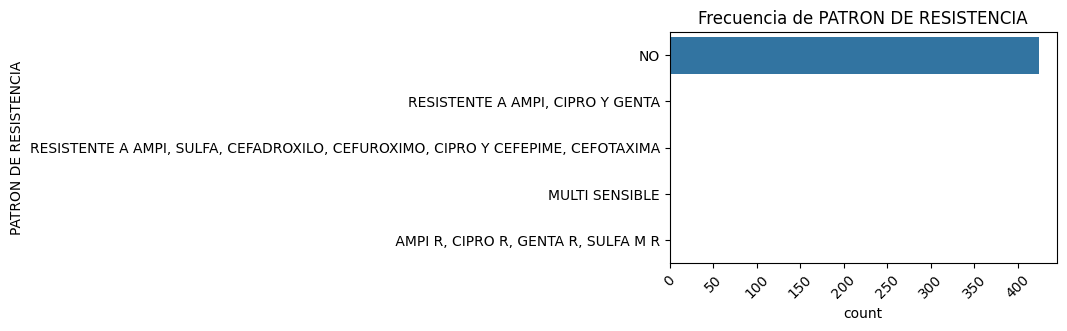

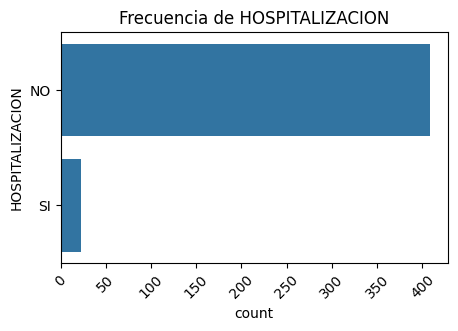

In [14]:
# Gráficos de barras de variables categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(data[col], order=data[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
    plt.show()

In [15]:
drop_columns = ['EDAD','HOSPITALIZACIÓN ULTIMO MES','PSA','BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 
                'NUMERO DE MUESTRAS TOMADAS', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA','DIAS HOSPITALIZACION MQ',
                'DIAS HOSPITALIZACIÓN UPC','DIABETES', 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS','NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA']

# Drop de las columnas y se guarda el resultado en la variable datos.
data = data.drop(columns=drop_columns)
data

,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,NEG,SI,NO,NO,NO,NO,SI
1,NEG,SI,NO,NO,NO,NO,SI
2,NEG,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI
3,NEG,SI,NO,NO,NO,NO,SI
4,NEG,SI,NO,HEMOCULTIVO,E.COLI,NO,SI
...,...,...,...,...,...,...,...
558,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
559,NEG,NO,NO,NO,NO,NO,NO
561,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO
563,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO


In [16]:
data.isna().sum()

BIOPSIA                  0
FIEBRE                   0
ITU                      0
TIPO DE CULTIVO          0
AGENTE AISLADO           0
PATRON DE RESISTENCIA    0
HOSPITALIZACION          0
dtype: int64

Transformaciones para preparar los datos 

Verificar datos de HOPITALIZACION

In [17]:
data[(data['HOSPITALIZACION']!='NO')&( data['HOSPITALIZACION']!='SI')]

,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION


In [18]:
# Variable para las columnas que se pasaran a True y False.
columnas_binarias = ['FIEBRE', 'ITU', 'HOSPITALIZACION']

for columna in columnas_binarias:
    data[columna] = data[columna].map({'SI':1, 'NO':0})

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 431 entries, 0 to 564
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   BIOPSIA                431 non-null    object
 1   FIEBRE                 431 non-null    int64 
 2   ITU                    431 non-null    int64 
 3   TIPO DE CULTIVO        431 non-null    object
 4   AGENTE AISLADO         431 non-null    object
 5   PATRON DE RESISTENCIA  431 non-null    object
 6   HOSPITALIZACION        431 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 26.9+ KB


Reemplazar variables categoricas binarias 'Si' y 'NO' con 1 y 0

In [19]:
# Variable para las columnas que pasaran a dummies.
columnas_dummies = ['TIPO DE CULTIVO', 'BIOPSIA', 'AGENTE AISLADO','PATRON DE RESISTENCIA'
                ]

# pasar los datos a tipo dummie pasandole la variable columnas_dummies creada anteriormente.
data = pd.get_dummies(data, columns=columnas_dummies,
                        drop_first=True
                        )
data

,FIEBRE,ITU,HOSPITALIZACION,TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 7,...,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,BIOPSIA_PROSTATITIS,AGENTE AISLADO_NO,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,1,0,1,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
1,1,0,1,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
2,1,0,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,1,0,1,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
4,1,0,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0,0,0,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
559,0,0,0,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
561,0,0,0,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
563,0,0,0,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [20]:
data['HOSPITALIZACION'].unique()

array([1, 0])

In [21]:
data['HOSPITALIZACION'] = pd.to_numeric(data['HOSPITALIZACION'])

In [22]:
data['HOSPITALIZACION'] = pd.to_numeric(data['HOSPITALIZACION'], errors='coerce')

In [23]:
data['HOSPITALIZACION'].unique()

array([1, 0])

In [24]:
data.select_dtypes(include=[int, float])

,FIEBRE,ITU,HOSPITALIZACION
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1
...,...,...,...
558,0,0,0
559,0,0,0
561,0,0,0
563,0,0,0


Matriz de correlación con el fin de determinar si hay variables redundantes.

In [31]:
corr = data.corr()
corr['HOSPITALIZACION'].sort_values(ascending=False)

HOSPITALIZACION                                                                                          1.000000
FIEBRE                                                                                                   0.674536
ITU                                                                                                      0.500435
TIPO DE CULTIVO_UROCULTIVO                                                                               0.407645
TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO                                                                 0.287576
PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA    0.287576
AGENTE AISLADO_PSEUDOMONAS AERUGINOSA                                                                    0.287576
PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA                                                   0.287576
PATRON DE RESISTENCIA_MULTI SENSIBLE                                                    

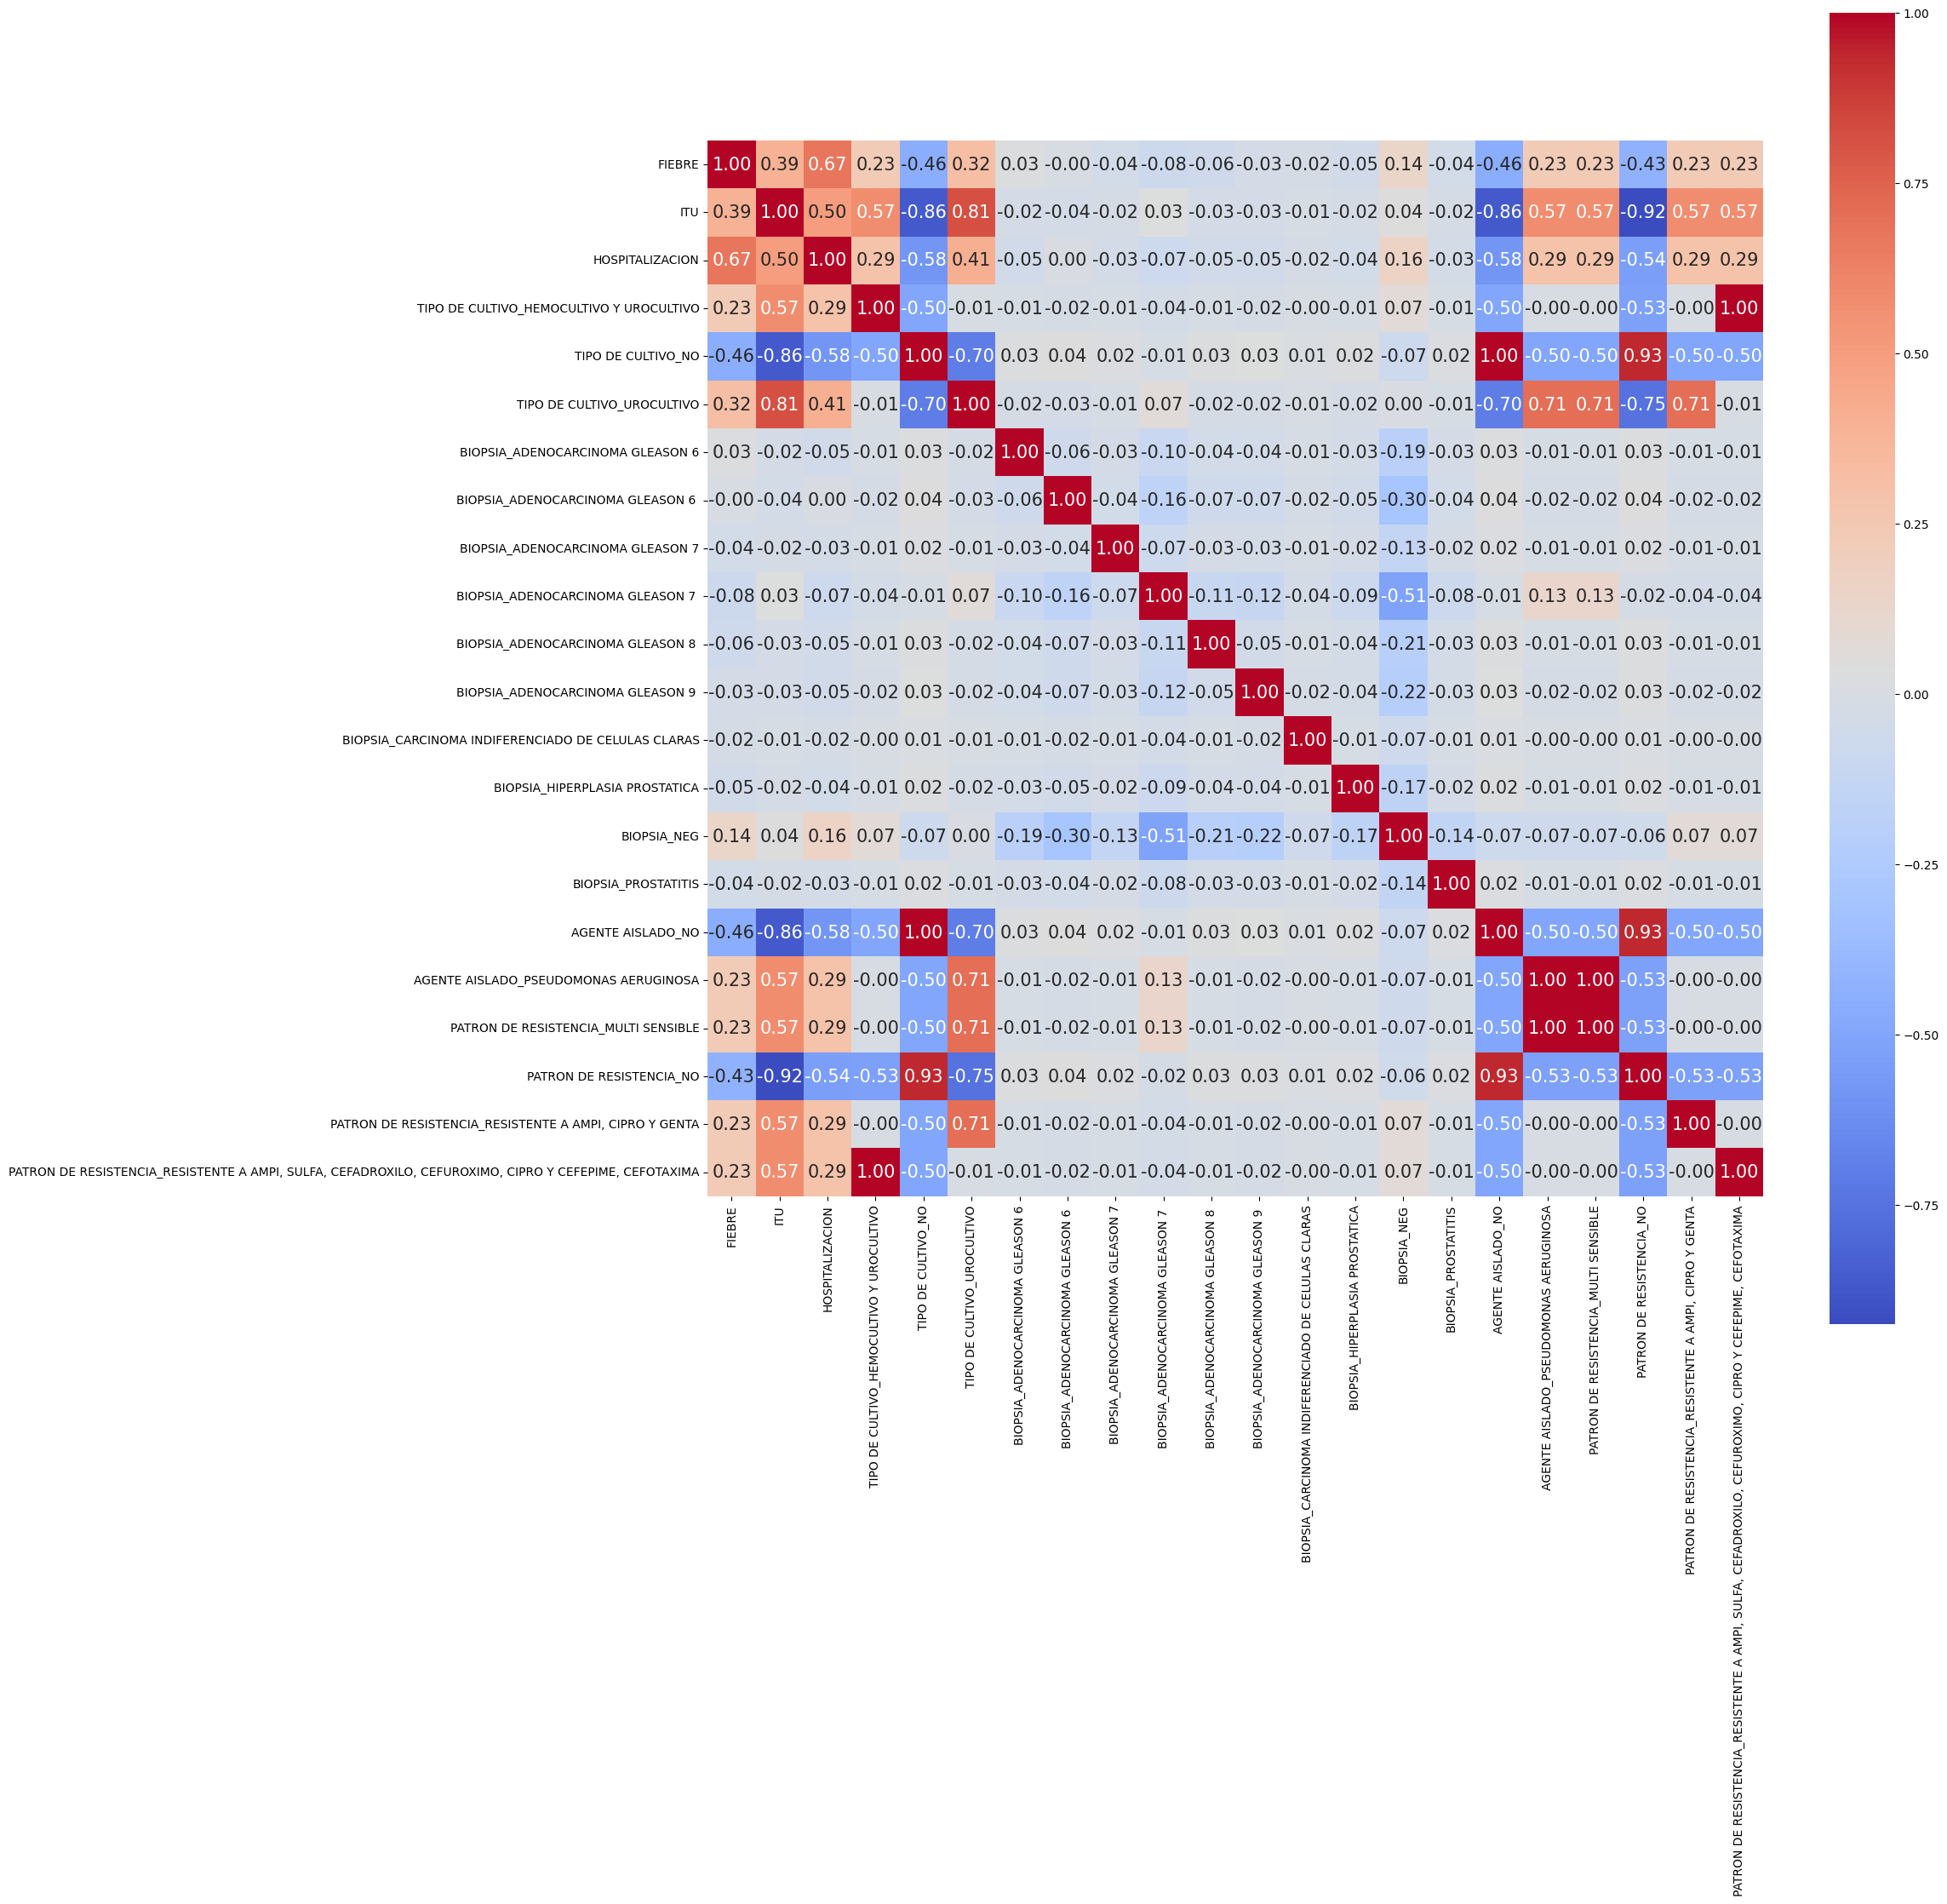

In [28]:
# Variable con correlacion de datos desde el Dataset con pandas.
corr = data.corr()

# Diagaramado con matplotlib y Seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= 'coolwarm')
plt.show()

>se realiza mediante el metodo corr() de pandas un analisis de correlacion con respecto a la variable HOSPITALIZACION con el fin de evaluar cuales variables darian mejores resultados y a su vez reducir la complejidad del modelo a elaborar (segun esta evaluacion se realiza un drop de dichas columnas unos pasos mas arriba en el codigo).

In [32]:
data.isnull().sum()

FIEBRE                                                                                                   0
ITU                                                                                                      0
HOSPITALIZACION                                                                                          0
TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO                                                                 0
TIPO DE CULTIVO_NO                                                                                       0
TIPO DE CULTIVO_UROCULTIVO                                                                               0
BIOPSIA_ADENOCARCINOMA GLEASON 6                                                                         0
BIOPSIA_ADENOCARCINOMA GLEASON 6                                                                         0
BIOPSIA_ADENOCARCINOMA GLEASON 7                                                                         0
BIOPSIA_ADENOCARCINOMA GLEASON 7     

Modelos de prediccion

In [34]:
# Seleccionar variables para X e y.
X = data.drop('HOSPITALIZACION', axis=1)
y = data['HOSPITALIZACION']

In [39]:
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
# Instancia de Smote
smote = SMOTE()
# se realiza un conteo en la variable y_train para verificar la cantidad de datos al inicio
conteo_i1 = Counter(y)
conteo_i1

#  Se hace el balanceo en los datos para el testeo y el train
X_train, y_train = smote.fit_resample(X,y)

# conteo final de la variable y
conteo_i2 = Counter(y_train)
conteo_i2


print(f'conteo train antes {conteo_i1}')
print(f'conteo train despues {conteo_i2}')

conteo train antes Counter({0: 408, 1: 23})
conteo train despues Counter({1: 408, 0: 408})


>Debido al desbalance en 'Y' se generan datos sinteticos con SMOTE()

In [40]:
# Se selecciona del total de los datos un 20% para el testeo y un 80% para el entrenamiento del modelo. 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.2, random_state=1990)

>Se dividen los datos en X y Y train y X y Y test, para el entrenamiento y el testeo del modelo.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Variable con las listas de elementos
modelos = []
resultados = []
nombres_modelos = []

# Agregar Modelos a las listas
modelos.append(('Regresion Logistica', LogisticRegression()))
modelos.append(('Arbol de Decision', DecisionTreeClassifier()))
modelos.append(('Bosque de Clasificacion', RandomForestClassifier()))

In [43]:
# For para instanciar los modelos con cross_val_score y obtener los parametros de manera individual
for nombre_modelo, model in modelos:
    kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=1990)
    resultados_cross_value = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    nombres_modelos.append(nombre_modelo)
    resultados.append(resultados_cross_value)

# imprimir resultado de modelos.
for i in range(len(nombres_modelos)):
    print(nombres_modelos[i], resultados[i].mean())

Regresion Logistica 0.9587070236636772
Arbol de Decision 0.9510518921693626
Bosque de Clasificacion 0.9609322800903195


REGRESION LOGISTICA

In [45]:
from sklearn.preprocessing import StandardScaler
# crear Pipeline
modelo = Pipeline((
    ('scale', StandardScaler()), ('log_reg', LogisticRegression(C=10, solver='lbfgs', n_jobs=-1,fit_intercept=True))
))

modelo.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('log_reg', LogisticRegression(C=10, n_jobs=-1))])

In [46]:
y_fit = modelo.predict(X_test)

In [47]:
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        83
           1       0.96      0.88      0.92        81

    accuracy                           0.92       164
   macro avg       0.92      0.92      0.92       164
weighted avg       0.92      0.92      0.92       164



In [48]:
matriz = confusion_matrix(y_test, y_fit)
matriz

array([[80,  3],
       [10, 71]])